In [1]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 
import ast
import json 
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

/data/svcf/software/anaconda3/envs/fastai/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


## Need to create RGB images in the same way we were with .mat files but now from nifti

First read in the aligned DTI from the last notebook: 

In [2]:
aligned_dti = pd.read_csv('aligned_dti.csv')

In [3]:
aligned_dti.tail(20)

,cohort,dti,exam,patient_id,segmentation_name,adc,aligned_dti
80,TCGA-GBM-nifti,['172-Apparent_Diffusion_Coefficien-07376.nii....,07-07-2004-41002,TCGA-06-0187,12-AxT1-thin_for_surgery-42560a_n,['172-Apparent_Diffusion_Coefficien-07376.nii....,['/working/lupolab/julia/tcia_analysis/dataset...
81,TCGA-GBM-nifti,"['13-DTI_N27-47032.nii.gz', '1302-DTI_N27-1602...",02-28-2000-MRI_BRAIN_WWO_CONTRAST-60307,TCGA-02-0060,14-3D_AX_FSPGR_POST-81939a_n,diffusion_b=1200,/working/lupolab/julia/tcia_analysis/datasets/...
82,TCGA-GBM-nifti,['6-MRHG_DIFFADC-47902.nii.gz'],03-20-2001-NR_MRI_BRAIN_WWO-90326,TCGA-19-1390,9-MRHG_T1_AX_Gd-93615a_n,['6-MRHG_DIFFADC-47902.nii.gz'],['/working/lupolab/julia/tcia_analysis/dataset...
83,TCGA-GBM-nifti,['474-Apparent_Diffusion_Coefficien-97986.nii....,07-02-2005-04728,TCGA-06-0240,9-AxT1-thin_for_surgery-27598a_n,['474-Apparent_Diffusion_Coefficien-97986.nii....,['/working/lupolab/julia/tcia_analysis/dataset...
84,TCGA-GBM-nifti,['7-ep2ddiff3scantraceADC-46169.nii.gz'],06-02-1999-BRAIN-09460,TCGA-12-0829,18-T1_AX_POST-73832a_n,['7-ep2ddiff3scantraceADC-46169.nii.gz'],['/working/lupolab/julia/tcia_analysis/dataset...
85,TCGA-GBM-nifti,"['7-MRHG_DIFFADC-81753.nii.gz', '7-MRHG_DIFFAD...",04-07-2001-NR_MRI_BRAIN_WWO-83151,TCGA-19-0955,11-MRHG_T1_AX_POST_GAD-32132a_n,"['7-MRHG_DIFFADC-81753.nii.gz', '7-MRHG_DIFFAD...",['/working/lupolab/julia/tcia_analysis/dataset...
86,TCGA-GBM-nifti,"['7-DTI-TRACTOGRAPHY-35855.nii.gz', '702-DTI-T...",07-25-1999-MRI_BRAIN_WWO_CONTR-49848,TCGA-02-0086,11-AX_T1_POST-86265a_n,diffusion_b=1000,/working/lupolab/julia/tcia_analysis/datasets/...
87,TCGA-GBM-nifti,['5-ADC-57186.nii.gz'],07-23-2000-MRI_BRAIN-99313,TCGA-12-1098,10-T1_AXIAL__POST-97398a_n,['5-ADC-57186.nii.gz'],['/working/lupolab/julia/tcia_analysis/dataset...
88,TCGA-GBM-nifti,['6-DIFFUSIONADC-19007.nii.gz'],03-15-2004-NR_MRI_BRAIN_WWO-30388,TCGA-19-5960,9-T1_AXIAL_Gd-31768a_n,['6-DIFFUSIONADC-19007.nii.gz'],['/working/lupolab/julia/tcia_analysis/dataset...
89,TCGA-GBM-nifti,['600-Exponential_Apparent_Diffusion_Coefficie...,03-19-2000-MRI_BRAIN_WWO_CONTRAST-00318,TCGA-14-1454,10-Ax_T1_SE_POST-41828a_n,['600-Exponential_Apparent_Diffusion_Coefficie...,['/working/lupolab/julia/tcia_analysis/dataset...


In [4]:
adc_dict = {row['patient_id']: row['aligned_dti'] for idx, row in aligned_dti.iterrows()}

In [5]:
seg_dict = {row['patient_id']: row['segmentation_name'] for idx, row in aligned_dti.iterrows()}

Next read in the json file for segmentation: 

In [6]:
with open('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/config/config_datalist_stripped.json') as f: 
    datalist = json.load(f)

In [7]:
datalist

{'validation': [{'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/8-AX_T1_pre_gd-14019a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/7-AX_T2_FR-FSE_RF2_150-55295a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/301-T1_SAG_SE-41348a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/501-T2-WHOLE_BRAIN-32557a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/401-T2_AX_FLAIR-72445a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-FG-A6J1/04-23-2004-NR_MRI_BRAIN_WWO-08141/

Creating lookup dictionaries with the modalities we care about for creating images: 

In [8]:
t1_post_dict = {x['image'][0].split('/')[1]:x['image'][0].split('/')[2]+'/'+x['image'][0].split('/')[3] for x in datalist['validation']}

In [9]:
t1_pre_dict = {x['image'][0].split('/')[1]:x['image'][1].split('/')[2]+'/'+x['image'][1].split('/')[3] for x in datalist['validation']}

In [10]:
t2_fse_dict = {x['image'][0].split('/')[1]:x['image'][2].split('/')[2]+'/'+x['image'][2].split('/')[3] for x in datalist['validation']}

In [11]:
t2_flair_dict = {x['image'][0].split('/')[1]:x['image'][3].split('/')[2]+'/'+x['image'][3].split('/')[3] for x in datalist['validation']}

In [12]:
t1_post_dict

{'TCGA-DU-5853': '08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
 'TCGA-CS-6186': '06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
 'TCGA-FG-A6J1': '04-23-2004-NR_MRI_BRAIN_WWO-08141/20-T1fl2dAx__Gd-43129a_n.nii.gz',
 'TCGA-DU-5872': '02-23-1995-MRI_BRAIN_WWO_CONTRAST-88714/13-Ax_T1_2.5mm_for_surgery-85579a_n.nii.gz',
 'TCGA-DU-7015': '06-18-1989-MRI_BRAIN_WWO_CONTRAS-16160/10-AX_T1_POST_GD_FLAIR-19430a_n.nii.gz',
 'TCGA-DU-8164': '01-11-1997-MRI_BRAIN_WWO_CONTRAST-98366/10-AX_T1_POST_GD_FLAIR-02819a_n.nii.gz',
 'TCGA-DU-A5TR': '07-26-1997-MRI_BRAIN_WWO_CONTRAST-17402/10-AX_T1_POST_GD_FLAIR-23755a_n.nii.gz',
 'TCGA-HT-7604': '10-28-1995-MRI_BRAIN_FOR_STEREOTACTIC_WWO_CONTR-85806/12-CAX_3D_SPGR-37353a_n.nii.gz',
 'TCGA-DU-A5TU': '03-12-1998-MRI_BRAIN_W_AND_WO_CONTR-77342/15-Axial_T1_FSE_Post_Gad-17816a_n.nii.gz',
 'TCGA-DU-8163': '11-19-1996-MRI_BRAIN_WWO_CONTRAST-27038/12-AX_T1_POST_GD_FLAIR-07772a_n.nii.gz',
 'TCGA-DU-7018': '12-20-

## Pick a patient & test reading in all things we need: 

In [13]:
patient_id = aligned_dti['patient_id'][88]

In [14]:
cohort = aligned_dti['cohort'][88]

In [15]:
patient_id

'TCGA-19-5960'

In [16]:
root_dir = Path('/working/lupolab/julia/tcia_analysis/datasets/')

In [17]:
t1c_vol = nib.load(Path(root_dir, cohort, patient_id, t1_post_dict[patient_id]))
t1c_vol = np.array(t1c_vol.dataobj)
t1c_vol.shape

(186, 229, 153)

In [18]:
t1c_vol = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-19-5960/03-15-2004-NR_MRI_BRAIN_WWO-30388/9-T1_AXIAL_Gd-31768a_n.nii.gz')
t1c_vol = np.array(t1c_vol.dataobj)


In [19]:
fla_vol = nib.load(Path(root_dir, cohort, patient_id, t2_flair_dict[patient_id]))
fla_vol = np.array(fla_vol.dataobj)

fla_vol.shape

(186, 229, 153)

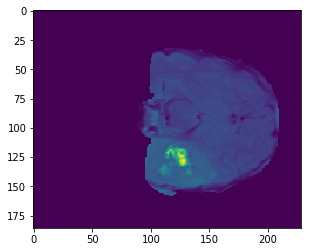

In [20]:
plt.imshow(fla_vol[:,:,55])

In [21]:
adc_vol = nib.load(Path(root_dir, cohort, patient_id, '03-15-2004-NR_MRI_BRAIN_WWO-30388/6-DIFFUSIONADC-19007a.nii.gz'))
adc_vol = np.array(adc_vol.dataobj)
adc_vol.shape

(186, 229, 153)

In [22]:
brainmask_name = '.'.join(t1_post_dict[patient_id].split('.')[:-2])+'_mask.nii.gz'
# print(brainmask_name)
brainmask_vol = nib.load(Path(root_dir, cohort, patient_id, brainmask_name))
brainmask_vol = np.array(brainmask_vol.dataobj)

brainmask_vol.shape

(186, 229, 153)

In [23]:
t2all_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/', seg_dict[patient_id], seg_dict[patient_id]+'_WT.nii.gz'))
t2all_vol = np.array(t2all_vol.dataobj)
t2all_vol.shape

(186, 229, 153)

In [24]:
cel_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/', seg_dict[patient_id], seg_dict[patient_id]+'_ET.nii.gz'))
cel_vol = np.array(cel_vol.dataobj)
cel_vol.shape

(186, 229, 153)

In [25]:
brainmask_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-19-5960/03-15-2004-NR_MRI_BRAIN_WWO-30388/9-T1_AXIAL_Gd-31768a_n_mask.nii.gz'))
brainmask_vol = np.array(brainmask_vol.dataobj)
brainmask_vol.shape

(186, 229, 153)

In [26]:
brainmask_new_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-19-5960/03-15-2004-NR_MRI_BRAIN_WWO-30388/9-T1_AXIAL_Gd-31768a_nNEW_mask.nii.gz'))
brainmask_new_vol = np.array(brainmask_new_vol.dataobj)

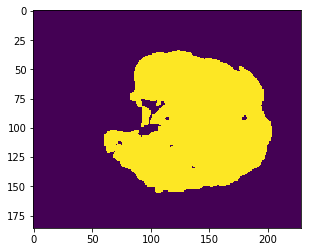

In [27]:
plt.imshow(brainmask_new_vol[:,:,55])

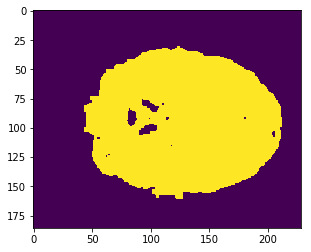

In [28]:
plt.imshow((brainmask_vol)[:,:,55])

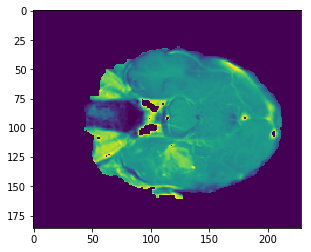

In [29]:
plt.imshow((t1c_vol*brainmask_vol)[:,:,55])

In [30]:
new_t1c_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-19-5960/03-15-2004-NR_MRI_BRAIN_WWO-30388/9-T1_AXIAL_Gd-31768a_nNEW.nii.gz'))

In [31]:
np.array(new_t1c_vol.dataobj).shape

(186, 229, 153)

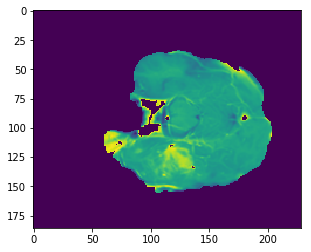

In [32]:
plt.imshow((np.array(new_t1c_vol.dataobj)*brainmask_vol)[:,:,55])

In [33]:
new_t1c_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-19-5960/03-15-2004-NR_MRI_BRAIN_WWO-30388/9-T1_AXIAL_Gd-31768a_premask_a.nii.gz'))

In [64]:
new_t1c_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-19-5960/03-15-2004-NR_MRI_BRAIN_WWO-30388/9-T1_AXIAL_Gd-31768a_n-031720.nii.gz'))

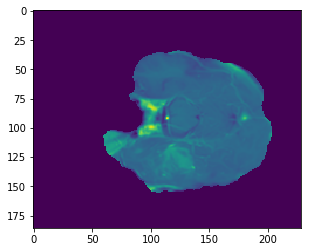

In [65]:
plt.imshow((np.array(new_t1c_vol.dataobj))[:,:,55])

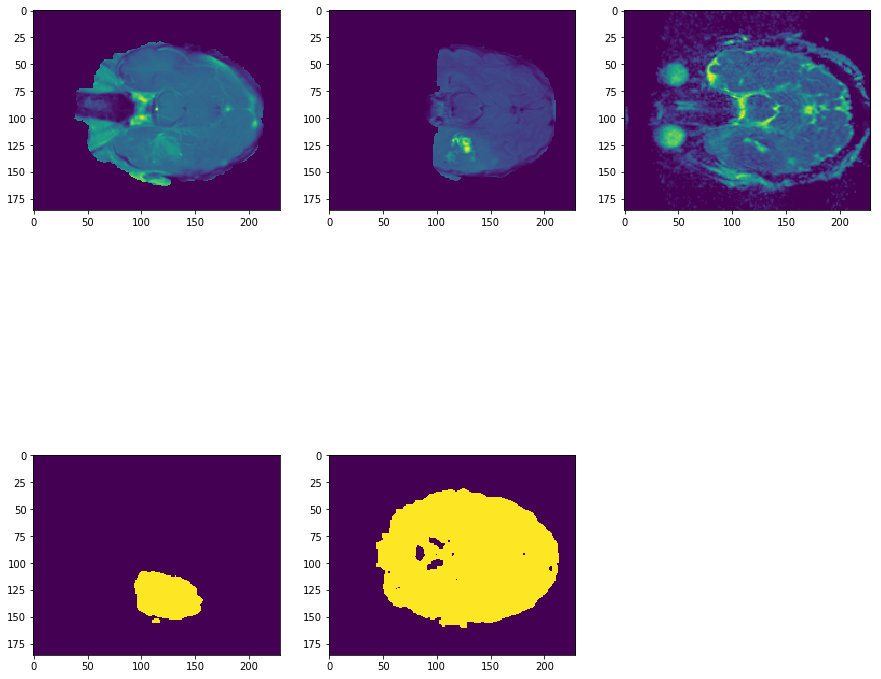

In [36]:
x = 55
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(t1c_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(fla_vol[:,:,x])
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(adc_vol[:,:,x])
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(t2all_vol[:,:,x])
ax4 = fig.add_subplot(2,3,5)
ax4.imshow(brainmask_vol[:,:,x])


## Looks good; let's test the rest of our processing pipeline: 

In [37]:
file_types = ['t1ca', 'fla', 'adca', 't2all', 'cel', 'brainmask']
img_types = file_types[0:3]
roi_types = file_types[3:5]
brainmask_types = file_types[5:6] 
max_area_roi = 'cel'
directions = ['coronal', 'axial', 'sagittal']
sab = 5
crop_roi = 't2all'
crop_padding = 10

In [38]:
files_dict = {'t1ca': t1c_vol, 'fla': fla_vol, 'adca': adc_vol, 'cel': cel_vol, 't2all': t2all_vol, 'brainmask': brainmask_vol}

In [39]:
## NORMALIZATION:
def zscore_normalize(img, brainmask): 
    masked_image_values = img[brainmask==1]
    img_norm = (img-masked_image_values.mean())/np.std(masked_image_values)
    img_norm = img_norm+abs(img_norm.min())
    img_norm_masked = img_norm*brainmask
#     img_norm_masked = img_norm_masked+abs(img_norm_masked.min())
    return img_norm_masked

In [40]:
norm_files_dict = {}
for file_type in img_types: 
    x = files_dict[file_type]
    norm_files_dict[file_type] = zscore_normalize(files_dict[file_type], files_dict['brainmask'])
    for file_type in roi_types: 
        norm_files_dict[file_type] = files_dict[file_type]
    for file_type in brainmask_types: 
        norm_files_dict[file_type] = files_dict[file_type]

In [41]:
other_roi = [x for x in roi_types if x != max_area_roi][0]

In [42]:
## Finding the slices in each direction with greatest amount of ROI lesion: 
def find_slices_with_max_area_roi(roi_img):
    if len(np.unique(roi_img)) >2: 
        print("ERROR! Weird ROI w/ more than 0/1 values")
    sum_roi_axial = roi_img.sum(axis = 1).sum(axis = 1)
    sum_roi_sagittal = roi_img.sum(axis= 0).sum(axis = 0)
    sum_roi_coronal = roi_img.sum(axis = 0).sum(axis = 1)
    return {'axial': int(sum_roi_axial.argmax()), 'sagittal': int(sum_roi_sagittal.argmax()), 'coronal': int(sum_roi_coronal.argmax())}
    

In [43]:
slices = find_slices_with_max_area_roi(norm_files_dict[max_area_roi])

In [44]:
slices

{'axial': 119, 'sagittal': 79, 'coronal': 131}

In [45]:
def create_center_slices_dict(norm_files_dict, directions, slices, slices_above_and_below = 0):
    ## This function extracts the slices that correspond to the max value of roi
    center_slices_dict = {}
    for plane in directions: 
        slice_pick = slices[plane]
        for img in img_types: 
            center_slices_dict_key = img+"_"+plane+"_"+str(slice_pick)
            if plane == 'axial': 
                center_slices_dict[center_slices_dict_key] = norm_files_dict[img][slice_pick, :,:]
            elif plane == "sagittal": 
                center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, :,slice_pick]
            elif plane == 'coronal': 
                center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, slice_pick,:]
    
    if slices_above_and_below > 0: 
        
        for plane in directions: 
            slice_pick = slices[plane]+slices_above_and_below
            for img in img_types: 
                center_slices_dict_key = img+"_"+plane+"_"+str(slice_pick)
                if plane == 'axial': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][slice_pick, :,:]
                elif plane == "sagittal": 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, :,slice_pick]
                elif plane == 'coronal': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, slice_pick,:]
        
        for plane in directions: 
            slice_pick = slices[plane]-slices_above_and_below
            for img in img_types: 
                center_slices_dict_key = img+"_"+plane+"_"+str(slice_pick)
                if plane == 'axial': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][slice_pick, :,:]
                elif plane == "sagittal": 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, :,slice_pick]
                elif plane == 'coronal': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, slice_pick,:]
                
    return center_slices_dict

In [46]:
center_slices_dict = create_center_slices_dict(norm_files_dict, directions, slices, slices_above_and_below=sab)

In [47]:
center_slices_dict.keys()

dict_keys(['t1ca_coronal_131', 'fla_coronal_131', 'adca_coronal_131', 't1ca_axial_119', 'fla_axial_119', 'adca_axial_119', 't1ca_sagittal_79', 'fla_sagittal_79', 'adca_sagittal_79', 't1ca_coronal_136', 'fla_coronal_136', 'adca_coronal_136', 't1ca_axial_124', 'fla_axial_124', 'adca_axial_124', 't1ca_sagittal_84', 'fla_sagittal_84', 'adca_sagittal_84', 't1ca_coronal_126', 'fla_coronal_126', 'adca_coronal_126', 't1ca_axial_114', 'fla_axial_114', 'adca_axial_114', 't1ca_sagittal_74', 'fla_sagittal_74', 'adca_sagittal_74'])

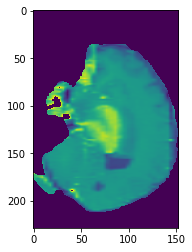

In [48]:
plt.imshow(center_slices_dict['t1ca_axial_114'])

In [75]:
other_other_roi = [x for x in roi_types if x != crop_roi][0]

In [76]:
## CREATING ROI BOUNDS 
def roi_bounds(roi, plane, slice_pick): 
    if plane == 'axial': 
        roi_slice = roi[slice_pick, :,:]
    elif plane == 'sagittal': 
        roi_slice = roi[:, :,slice_pick]
    elif plane == 'coronal': 
        roi_slice = roi[:, slice_pick,:]
    
    if roi_slice.any(): 
        r = np.any(roi_slice, axis=(1))
        c = np.any(roi_slice, axis=(0))

        rmin, rmax = np.where(r)[0][[0, -1]]
        cmin, cmax = np.where(c)[0][[0, -1]]

        status_code = 0
        return rmin, rmax, cmin, cmax, status_code
    else: 
        rmin, rmax, cmin, cmax = None, None, None, None 
        status_code = 1
        return rmin, rmax, cmin, cmax, status_code 

## COMPUTING SQUARE ROI BOUNDS
def compute_square_dims_flex(roi_img, plane, slice_pick, padding = 0): 
    
    rmin, rmax, cmin, cmax, status_code = roi_bounds(roi_img, plane, slice_pick)
    
    if status_code == 0: 

        r = rmax-rmin
        c = cmax-cmin

        diff = abs(r - c)
        expand_number = int(diff/2)
    #     print(expand_number)
        if r == c: 
            print('already square.')
        if r > c: 
            if diff % 2 == 0: 
                cmax_new = cmax+expand_number+padding
                cmin_new = cmin-expand_number-padding
            else: 
                cmax_new = cmax+expand_number+1+padding
                cmin_new = cmin-expand_number-padding
            if cmin_new < 0: 
                cmin_new, cmax_new = cmin_new+abs(cmin_new), cmax_new+abs(cmin_new)
            return rmin-padding, rmax+padding, cmin_new, cmax_new, status_code

        else: 
            if diff % 2 == 0: 
                rmax_new = rmax+expand_number+padding
                rmin_new = rmin-expand_number-padding
            else: 
                rmax_new = rmax+expand_number+1+padding
                rmin_new = rmin-expand_number-padding    
            if rmin_new < 0: 
                rmin_new, rmax_new = rmin_new+abs(rmin_new), rmax_new+abs(rmin_new)

            return rmin_new, rmax_new, cmin-padding, cmax+padding, status_code 
    else: 
        return rmin, rmax, cmin, cmax, status_code 
        

## CREATING DICTIONARY OF CROPPED SLICES: 
def create_cropped_slices_dict(center_slices_dict, roi, padding = 0):
    cropped_slices_dict = {}
    for key, value in center_slices_dict.items(): 
#         print(key)
        img_type, plane, slice_pick = key.split('_')
        slice_pick = int(slice_pick)
        rmin, rmax, cmin, cmax, status_code = compute_square_dims_flex(roi, plane, slice_pick, padding)
        if status_code == 0: 
            if rmin < 0 or cmin < 0:
                rmin, rmax, cmin, cmax, status_code = compute_square_dims_flex(roi, plane, slice_pick, padding=0)
#             print(rmin, rmax, cmin, cmax)
            new_key = str(key)+"_dim"+str(rmax-rmin)
            cropped_slices_dict[new_key] = value[rmin:rmax, cmin:cmax]
        else: 
            continue
    return cropped_slices_dict

In [77]:
cropped_slices_dict = create_cropped_slices_dict(center_slices_dict, norm_files_dict[crop_roi], padding = crop_padding)

In [78]:
cropped_slices_dict.keys()

dict_keys(['t1ca_coronal_131_dim87', 'fla_coronal_131_dim87', 'adca_coronal_131_dim87', 't1ca_axial_119_dim102', 'fla_axial_119_dim102', 'adca_axial_119_dim102', 't1ca_sagittal_79_dim105', 'fla_sagittal_79_dim105', 'adca_sagittal_79_dim105', 't1ca_coronal_136_dim87', 'fla_coronal_136_dim87', 'adca_coronal_136_dim87', 't1ca_axial_124_dim104', 'fla_axial_124_dim104', 'adca_axial_124_dim104', 't1ca_sagittal_84_dim104', 'fla_sagittal_84_dim104', 'adca_sagittal_84_dim104', 't1ca_coronal_126_dim88', 'fla_coronal_126_dim88', 'adca_coronal_126_dim88', 't1ca_axial_114_dim98', 'fla_axial_114_dim98', 'adca_axial_114_dim98', 't1ca_sagittal_74_dim103', 'fla_sagittal_74_dim103', 'adca_sagittal_74_dim103'])

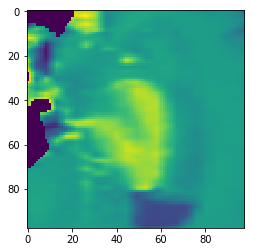

In [79]:
plt.imshow(cropped_slices_dict['t1ca_axial_114_dim98'])

In [80]:
## CONCATENATING THE IMAGES + PUTTING THEM IN A DICTIONARY FOR WRITING: 
def create_imgs(cropped_slices_dict): 
    new_imgs_dict = {}
    #cropped slices dictionary 
    keys = cropped_slices_dict.keys()
    
    slices_of_interest = list(set(['_'.join((key.split('_')[-2], key.split('_')[-1])) for key in keys]))
    
    for slice_pick in slices_of_interest: 
        slices_for_img = [key for key in keys if slice_pick in key]
        slices_for_img.sort() 
        
        new_key = '_'.join((slices_for_img[0].split('_')[-3], slices_for_img[0].split('_')[-2]))
        
        adca_img = cropped_slices_dict[slices_for_img[0]]
        fla_img  = cropped_slices_dict[slices_for_img[1]]
        t1ca_img = cropped_slices_dict[slices_for_img[2]]
        
        new_img = np.dstack([t1ca_img, fla_img, adca_img])
        
        new_imgs_dict[new_key] = new_img
    
    return new_imgs_dict

In [81]:
new_images_dict = create_imgs(cropped_slices_dict)

In [82]:
new_images_dict.keys()

dict_keys(['coronal_136', 'axial_124', 'sagittal_84', 'coronal_126', 'coronal_131', 'axial_114', 'sagittal_74', 'sagittal_79', 'axial_119'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


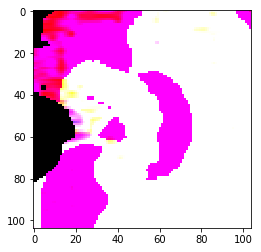

In [83]:
plt.imshow(new_images_dict['axial_124'])